In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Load the training and test sets.

train_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
# A look at the first five rows of the training set.

train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# A look at the shape of the training set.

train_set.shape

(1460, 81)

In [5]:
# The correlation of all features with respects to the SalePrice.

train_set.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
# A look at those features that have the most amount of null values... and there a lot of them!

(train_set.isna().sum()[train_set.isna().sum()!=0].sort_values(ascending=False)/train_set.shape[0])*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
# A way to look at the features with most null values and their correlation number with respects to the SalePrice.

null_sr = train_set.isna().sum()[train_set.isna().sum()!=0].sort_values(ascending=False)
for feat in null_sr.keys():
    try:
        print(feat, ' - ', train_set[feat].dtype, ' - ', train_set.corr().loc[feat,'SalePrice'])
    except KeyError:
        print(feat, ' - ', train_set[feat].dtype,  ' - ', 'None')

PoolQC  -  object  -  None
MiscFeature  -  object  -  None
Alley  -  object  -  None
Fence  -  object  -  None
FireplaceQu  -  object  -  None
LotFrontage  -  float64  -  0.35179909657067737
GarageType  -  object  -  None
GarageYrBlt  -  float64  -  0.4863616774878596
GarageFinish  -  object  -  None
GarageQual  -  object  -  None
GarageCond  -  object  -  None
BsmtExposure  -  object  -  None
BsmtFinType2  -  object  -  None
BsmtFinType1  -  object  -  None
BsmtCond  -  object  -  None
BsmtQual  -  object  -  None
MasVnrArea  -  float64  -  0.47749304709571444
MasVnrType  -  object  -  None
Electrical  -  object  -  None


In [8]:
# I dropped the columns that had too many null values.

train_cp = train_set.copy()
train_cp.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)
train_cp.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# The description of numerical features.

train_cp.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# I just wanted to find out which features are type objects.

obj_cols = train_cp.dtypes.sort_values()

for cols in obj_cols.index:
    if obj_cols[cols]!="object":
        print(cols)

MSSubClass
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
BsmtFinSF2
BsmtFinSF1
SalePrice
OverallQual
LotArea
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
GarageYrBlt


In [11]:
# Me using Sklearn to fit a linear regression model in the dataset. That is in the next few cells.

from sklearn.compose import make_column_selector as selector

X = train_cp.drop(columns=['SalePrice'])
y = train_cp['SalePrice']

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
numerical_columns = list(set(numerical_columns) - set(['MSSubClass','OverallQual','OverallCond']))
categorical_columns = categorical_columns_selector(X) + ['MSSubClass','OverallQual','OverallCond']

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

categorical_prepro = Pipeline([
    ('simpute_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_prepro = Pipeline([
    ('simpute_num', SimpleImputer(strategy="median")),
    ('sscaler', StandardScaler())
])
    
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_prepro, numerical_columns),
    ('cat', categorical_prepro, categorical_columns),
])

lin_model = Pipeline([
    ('prepro', preprocessor),
    ('linreg', LinearRegression())
])


In [13]:
from sklearn.model_selection import cross_val_score


xval = cross_val_score(lin_model, X, y, cv=10)

In [14]:
print(xval.mean(), xval.std())

0.8219854922182261 0.12101867930422491


## **More Analysis**

<AxesSubplot:>

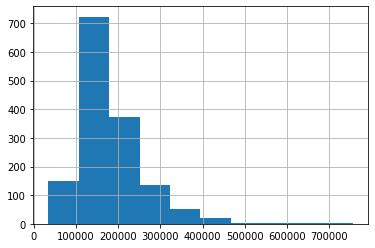

In [15]:
# A look at the SalePrice distribution.

train_cp['SalePrice'].hist()

In [16]:
# Looking ahead at executing a contingency table, I created an Ordinal cateogorizer for the SalePrice column.
train_cp['SalePrice_Cat'] = pd.cut(train_cp['SalePrice'],bins=[0,100000,200000,300000,400000,500000,np.inf], labels=[0,1,2,3,4,5])
train_cp['SalePrice_Cat'].value_counts()

1    910
2    312
0    123
3     87
4     19
5      9
Name: SalePrice_Cat, dtype: int64

In [17]:
# A crosstab of one of the features and the ordinal SalePrice column.

pd.crosstab(index=train_cp['MSSubClass'], columns=train_cp['SalePrice_Cat'])

SalePrice_Cat,0,1,2,3,4,5
MSSubClass,,,,,,
20,24,343,120,39,7,3
30,39,30,0,0,0,0
40,1,2,1,0,0,0
45,4,8,0,0,0,0
50,18,109,13,3,1,0
60,0,121,127,35,10,6
70,4,42,12,2,0,0
75,0,11,3,1,1,0
80,0,54,3,1,0,0


In [18]:
# A contingency table to know which features have a p-value of over 0.05.

from scipy.stats import chi2_contingency

for cat in categorical_columns:
    pvalue = chi2_contingency(pd.crosstab(index=train_cp[cat], columns=train_cp['SalePrice_Cat']))[1]
    if pvalue > 0.05:
        print(cat,': ',pvalue)

Street :  0.40131256298757184
Utilities :  0.9877819622782419
LandSlope :  0.3922823077836337
Condition2 :  0.259141760373944


In [19]:
# Thus, eliminating those columns from the analysis
train_cp.drop(columns=['Street','Utilities','LandSlope','Condition2'],inplace=True)

In [20]:
# Me trying to construct an Sklearn Linear Regression function, in order to not summon all of those lines of code in every cell.

def linreg(df,x_drop, y_col):
    X = df.drop(columns=x_drop)
    y = df[y_col]

    numerical_columns_selector = selector(dtype_exclude=object)
    categorical_columns_selector = selector(dtype_include=object)

    numerical_columns = numerical_columns_selector(X)
    numerical_columns = list(set(numerical_columns) - set(['MSSubClass','OverallQual','OverallCond']))
    categorical_columns = categorical_columns_selector(X) + ['MSSubClass','OverallQual','OverallCond']

    categorical_prepro = Pipeline([
        ('simpute_cat', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    numerical_prepro = Pipeline([
        ('simpute_num', SimpleImputer(strategy="median")),
        ('sscaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_prepro, numerical_columns),
        ('cat', categorical_prepro, categorical_columns),
    ])

    lin_model = Pipeline([
        ('prepro', preprocessor),
        ('linreg', LinearRegression())
    ])

    xval = cross_val_score(lin_model, X, y, cv=10)

    return xval.mean(), xval.std()

In [21]:
# My prediction got better when eliminating those columns that had a lot of null values and high p-values.
linreg(train_cp,['SalePrice','SalePrice_Cat'],'SalePrice')

(0.8426958651981471, 0.099963745986019)

## **Statsmodel Analysis**

In [22]:
# Loading Statsmodels

import statsmodels.formula.api as sm

In [23]:
# Me constructing the formula string, to feed it into Statsmodels.

train_cp_colname = train_cp.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThreeSsnPorch'})

numerical_columns_selector_colname = selector(dtype_exclude=object)
categorical_columns_selector_colname = selector(dtype_include=object)

numerical_columns_colname = numerical_columns_selector_colname(train_cp_colname)
numerical_columns_colname = list(set(numerical_columns_colname) - set(['MSSubClass','OverallQual','OverallCond']))
categorical_columns_colname = categorical_columns_selector_colname(train_cp_colname) + ['MSSubClass','OverallQual','OverallCond']

full_columns = categorical_columns_colname + numerical_columns_colname

ols_str = 'SalePrice ~'
for col in full_columns:
    if 'SalePrice' not in col:
        ols_str = ols_str + f' {col} +'

ols_str = ols_str[0:-2]
ols_str
    

'SalePrice ~ MSZoning + LotShape + LandContour + LotConfig + Neighborhood + Condition1 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + GarageType + GarageFinish + GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition + MSSubClass + OverallQual + OverallCond + OpenPorchSF + WoodDeckSF + GarageYrBlt + YearRemodAdd + MoSold + MiscVal + LowQualFinSF + MasVnrArea + HalfBath + BsmtFinSF1 + ScreenPorch + BedroomAbvGr + TotRmsAbvGrd + YrSold + GrLivArea + SecondFlrSF + GarageCars + PoolArea + YearBuilt + BsmtUnfSF + BsmtFullBath + FirstFlrSF + LotArea + KitchenAbvGr + GarageArea + Fireplaces + BsmtFinSF2 + TotalBsmtSF + EnclosedPorch + ThreeSsnPorch + FullBath + BsmtHalfBath'

In [24]:
# Looking at the Linear regression results.
# It is good to analyse p-values and some other stuff like the R-squared value, AIC.

model_ols = sm.ols(formula=ols_str, data=train_cp_colname)
fitted_ols = model_ols.fit()
print(fitted_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     58.93
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:00:50   Log-Likelihood:                -15321.
No. Observations:                1338   AIC:                         3.107e+04
Df Residuals:                    1126   BIC:                         3.217e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [25]:
# Since the AIC is too high, I attempted to eliminate those features with high p-values.

ols_str_p = 'SalePrice ~ MSZoning + RoofMatl + BsmtQual + OverallQual + OverallCond +  BsmtFinSF1 + TotalBsmtSF + PoolArea + LotArea + GrLivArea + SecondFlrSF + GarageCars + TotRmsAbvGrd + KitchenAbvGr + YearBuilt + ScreenPorch + WoodDeckSF + GarageQual + LandContour'
model_ols_p = sm.ols(formula=ols_str_p, data=train_cp_colname)
fitted_ols_p = model_ols_p.fit()
print(fitted_ols_p.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     231.5
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:00:50   Log-Likelihood:                -15798.
No. Observations:                1349   AIC:                         3.167e+04
Df Residuals:                    1313   BIC:                         3.186e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.352e+06   1

## **Even More Analysis**

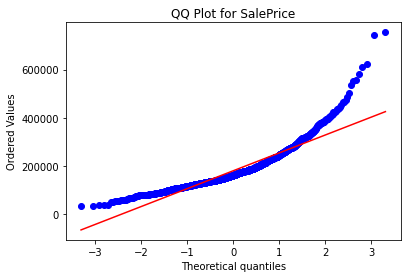

In [26]:
# In order for me to find whether a certain feature is not linear, I resorted to the QQ plot.
# The next number of cells will show how some features are not even linear.

import matplotlib.pyplot as plt
from scipy import stats

stats.probplot(x=train_cp['SalePrice'], dist="norm", plot=plt)
plt.title("QQ Plot for SalePrice")
plt.show()

In [27]:
transformed_price, lambda_price = stats.boxcox(train_cp['SalePrice'])
lambda_price

-0.07692391328663316

In [28]:
# I found that the SalesPrice column is not linear. Based on what I learned,
# it might be a logarythm distribution.

ols_str_log = 'np.log(SalePrice) ~ MSZoning + RoofMatl + BsmtQual + OverallQual + OverallCond +  BsmtFinSF1 + TotalBsmtSF + PoolArea + LotArea + GrLivArea + SecondFlrSF + GarageCars + TotRmsAbvGrd + KitchenAbvGr + YearBuilt + ScreenPorch + WoodDeckSF + GarageQual + LandContour'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_log = sm.ols(formula=ols_str_log, data=train_cp_colname)
fitted_ols_log = model_ols_log.fit()
print(fitted_ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     306.8
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:00:51   Log-Likelihood:                 898.60
No. Observations:                1349   AIC:                            -1725.
Df Residuals:                    1313   BIC:                            -1538.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.3800    

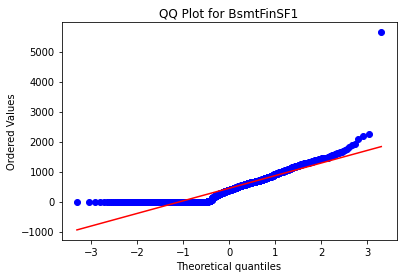

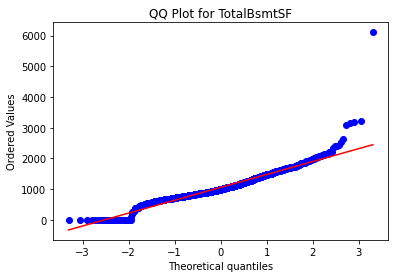

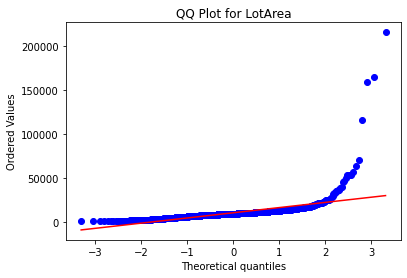

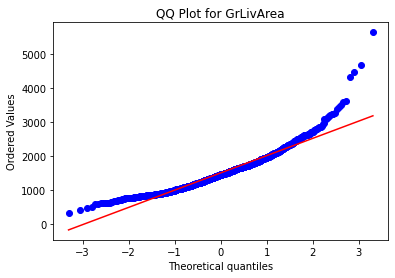

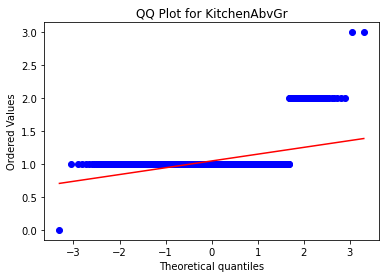

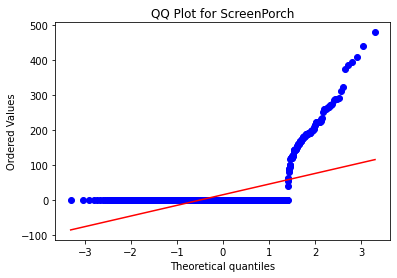

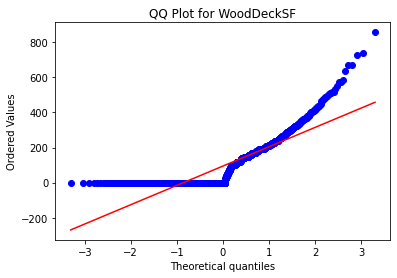

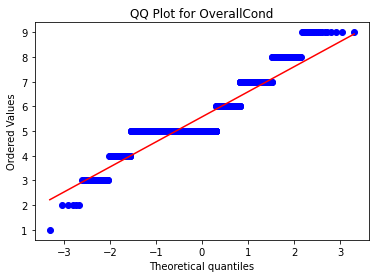

In [29]:
# This just opened the flood gates because if the SalesPrice is not linear, then which features are???
for col in ['BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','KitchenAbvGr','ScreenPorch','WoodDeckSF','OverallCond']:
    stats.probplot(x=train_cp[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {col}")
    plt.show()

In [30]:
# I remember the lambda thing. Depending on how lambda is shown, the feature might take a different distribution all in its self.
for col in ['BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','KitchenAbvGr','ScreenPorch','WoodDeckSF','OverallCond']:
    try: 
        transformed_price, lambda_price = stats.boxcox(train_cp[col])
        print(f'Box-Cox of {col}: ',lambda_price)
    except ValueError:
        print(f"{col}'s values are not all positive!")

BsmtFinSF1's values are not all positive!
TotalBsmtSF's values are not all positive!
Box-Cox of LotArea:  0.03094631071248529
Box-Cox of GrLivArea:  0.006304841218621503
KitchenAbvGr's values are not all positive!
ScreenPorch's values are not all positive!
WoodDeckSF's values are not all positive!
Box-Cox of OverallCond:  0.41391222511848924


In [31]:
# Thus, changing some feature distributions into log distributions.
# The R-squared went up again and the AIC went down. COOL!!
ols_str_log = 'np.log(SalePrice) ~ C(MSZoning) + C(RoofMatl) + C(BsmtQual) + C(OverallQual) + C(OverallCond) +  BsmtFinSF1 + TotalBsmtSF + np.log(LotArea) + np.log(GrLivArea) + GarageCars + TotRmsAbvGrd + C(KitchenAbvGr) + YearBuilt + ScreenPorch + WoodDeckSF + C(LandContour)'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_log = sm.ols(formula=ols_str_log, data=train_cp_colname)
fitted_ols_log = model_ols_log.fit()
print(fitted_ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     286.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:00:53   Log-Likelihood:                 972.03
No. Observations:                1423   AIC:                            -1852.
Df Residuals:                    1377   BIC:                            -1610.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [32]:
# A train-test-split on the training data.

from sklearn.model_selection import train_test_split as tts

Xtts = train_cp_colname.drop(columns='SalePrice')
ytts = train_cp_colname['SalePrice']

Xtrain_tts, Xtest_tts, ytrain_tts, ytest_tts = tts(Xtts, ytts, train_size=0.90, random_state=0)

In [33]:
# The reformed statsmodel on the training data.

Xtrain_tts['SalePrice'] = ytrain_tts
Xtest_tts['SalePrice'] = ytest_tts
ols_str_log = 'np.log(SalePrice) ~ C(MSZoning) + C(RoofMatl) + C(BsmtQual) + OverallQual + C(OverallCond) +  BsmtFinSF1 + TotalBsmtSF + np.log(LotArea) + np.log(GrLivArea) + GarageCars + TotRmsAbvGrd + C(KitchenAbvGr) + YearBuilt + ScreenPorch + WoodDeckSF + C(LandContour)'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_logtts = sm.ols(formula=ols_str_log, data=Xtrain_tts)
fitted_ols_logtts = model_ols_logtts.fit()
print(fitted_ols_logtts.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     296.7
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:00:54   Log-Likelihood:                 846.80
No. Observations:                1282   AIC:                            -1616.
Df Residuals:                    1243   BIC:                            -1415.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
# The definition of the RMSE, MAE and MAPE functions

def RMSE(prediction,true_values):
    
    return np.sqrt(                                                          # Root
            np.mean(                                                      # Mean
                np.square(                                                # Squared
                         prediction-true_values                           # Error
                )
            )
        )

def MAE(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

def MAPE(prediction,true_value):
    return np.mean(                                           # Mean
        np.abs(                                               # Absolute
               (prediction-true_value)/true_value             # Error
            )*100                                            # Percentage
    )

In [35]:
print("RMSE between model_log and log of true Sale price:", RMSE(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice')), np.log(ytest_tts)))
print("RMSE between exp(model_log) and true Sale price:", RMSE(np.exp(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice'))), ytest_tts))

RMSE between model_log and log of true Sale price: 0.11363409678151537
RMSE between exp(model_log) and true Sale price: 24857.9161698642


In [36]:
print("MAPE between model_log and log of true Sale price:", MAPE(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice')), np.log(ytest_tts)))
print("MAPE between exp(model_log) and true Sale price:", MAPE(np.exp(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice'))), ytest_tts))

MAPE between model_log and log of true Sale price: 0.7272355563734959
MAPE between exp(model_log) and true Sale price: 8.616713948995507


# **Predictions**

## **Statsmodels Approach**

In [37]:
# Testing the Statsmodel on predictions.
# I had to rename some columns because the number at the beginning of the feature names.

test_cp = test_set.copy()
test_cp.drop(columns=['Street','Utilities','LandSlope','Condition2'],inplace=True)
test_cp_colname = test_cp.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThreeSsnPorch'})

In [38]:
# The actual prediciton.

test_pred = np.exp(fitted_ols_log.predict(test_cp_colname))

In [39]:
# Save the predicition output.

test_pred_df = pd.DataFrame({'Id': test_set['Id'], 'SalePrice': test_pred})
test_pred_df['SalePrice'][test_pred_df['SalePrice'].isnull()] = test_pred_df['SalePrice'].describe()['25%']

test_pred_df.to_csv('house_price_submission.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## **Keras Approach**

In [40]:
# This is the Keras approach in our predictions.
# The result is to use the same transformations on features (np.log) as done in the Statsmodels version.

def normalize(df):
    df -= df.mean()
    df /= df.std()
    
    return df

xfull = train_cp_colname[['MSZoning','RoofMatl','BsmtQual','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','GarageCars','TotRmsAbvGrd','KitchenAbvGr','YearBuilt','ScreenPorch','WoodDeckSF','LandContour']]
xfull['LotArea'] = np.log(xfull['LotArea'])
xfull['GrLivArea'] = np.log(xfull['GrLivArea'])
yfull = np.log(train_cp_colname['SalePrice'])

xfull = pd.get_dummies(xfull).astype('float32')

xfull = normalize(xfull) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [41]:
# A manual version of train-test-splits. I should've used Sklearn.

xval = xfull[:200]
#ytrain = train_cp_colname['SalePrice']
xtrain = xfull[200:]

yval = yfull[:200]
ytrain = yfull[200:]

In [42]:
# My NN approach of solving this problem. 2000 epochs because I found out that the more it trains, the lower is the MAE.
# One thing I found is to use df.values as the NN input.

from keras import layers, Sequential, models

model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(xtrain.shape[-1],)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(
      xtrain.values,
      ytrain,
      epochs = 2000,
      batch_size = 512,
      validation_data = (xval.values, yval)
  )


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/2000
3/3 [==============================] - 1s 120ms/step - loss: 114.4234 - mae: 10.4853 - val_loss: 36.6600 - val_mae: 5.2227
Epoch 2/2000
3/3 [==============================] - 0s 27ms/step - loss: 25.5469 - mae: 4.0152 - val_loss: 21.8867 - val_mae: 2.3600
Epoch 3/2000
3/3 [==============================] - 0s 30ms/step - loss: 11.6909 - mae: 2.3862 - val_loss: 11.3499 - val_mae: 1.8391
Epoch 4/2000
3/3 [==============================] - 0s 31ms/step - loss: 5.3243 - mae: 1.5381 - val_loss: 7.9557 - val_mae: 1.7581
Epoch 5/2000
3/3 [==============================] - 0s 32ms/step - loss: 4.3359 - mae: 1.5897 - val_loss: 12.9026 - val_mae: 1.9473
Epoch 6/2000
3/3 [==============================] - 0s 28ms/step - loss: 7.3870 - mae: 2.2304 - val_loss: 8.4928 - val_mae: 2.3104
Epoch 7/2000
3/3 [==============================] - 0s 28ms/step - loss: 3.4985 - mae: 1.5144 - val_loss: 6.6735 - val_mae: 1.0454
Epoch 8/2000
3/3 [==============================] - 0s 27ms/step - loss: 

In [43]:
# Me trying to look at the history keys.

history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

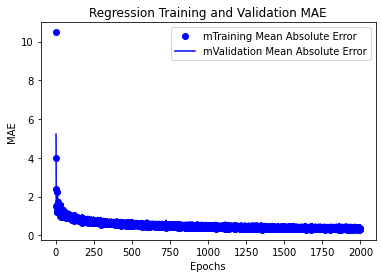

In [44]:
# Me trying to plot the MAE in the training and validation sets.

mloss = history.history['loss']
mmae = history.history['mae']
mval_mae = history.history['val_mae']
epochs = range(1, len(mloss)+1)

plt.clf()
plt.plot(epochs, mmae, 'bo', label='mTraining Mean Absolute Error')
plt.plot(epochs, mval_mae, 'b', label='mValidation Mean Absolute Error')
plt.title('Regression Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [45]:
# According to the graph above, the 1000th epoch is the most efficient, it seems.

history = model.fit(
      xtrain.values,
      ytrain,
      epochs = 1000,
      batch_size = 512,
      validation_data = (xval.values, yval)
  )

Epoch 1/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.1128 - mae: 0.3238 - val_loss: 6.5547 - val_mae: 0.5337
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1512 - mae: 0.3544 - val_loss: 5.3561 - val_mae: 0.5337
Epoch 3/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1415 - mae: 0.3531 - val_loss: 6.7971 - val_mae: 0.5078
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1047 - mae: 0.3100 - val_loss: 5.6515 - val_mae: 0.5044
Epoch 5/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1058 - mae: 0.3088 - val_loss: 6.9268 - val_mae: 0.5181
Epoch 6/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1205 - mae: 0.3341 - val_loss: 5.4541 - val_mae: 0.5463
Epoch 7/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1320 - mae: 0.3440 - val_loss: 7.0616 - val_mae: 0.5256
Epoch 8/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1167 - m

In [46]:
# Evaluation of the validation set, where the second value is the loss.

model.evaluate(xval.values,yval)

7/7 [==============================] - 0s 3ms/step - loss: 9.1853 - mae: 0.5454


[9.18529987335205, 0.5453768372535706]

In [47]:
# Statsmodel prepro of the test set, in preparation into the NN.

xfull_test = test_cp_colname[['MSZoning','RoofMatl','BsmtQual','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','GarageCars','TotRmsAbvGrd','KitchenAbvGr','YearBuilt','ScreenPorch','WoodDeckSF','LandContour']]
xfull['LotArea'] = np.log(xfull_test['LotArea'])
xfull_test['GrLivArea'] = np.log(xfull_test['GrLivArea'])
xfull_test = pd.get_dummies(xfull_test).astype('float32')
xfull_test = normalize(xfull_test) 
#xfull_test[['RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll']] = 0
#model.predict(xfull_test.values)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
# I found the test set is not fully representative of the full scope of the training set.
# Hence, the set substraction... to find which columns (I had to One-Hot the training set) are in the training set, and not in the test set.

set(xfull.columns) - set(xfull_test.columns)
xfull_test[['RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll']] = 0

In [49]:
# NN prediction.

ypred = model.predict(xfull_test.values)

In [50]:
# Just a test of the RMSE.

np.sqrt(np.mean((np.exp(ypred.flatten()[:1260])-np.exp(ytrain))**2))

1.2933367763400549e+28

In [51]:
# Storing the predictions in a file to submit it afterwards.

test_pred_df = pd.DataFrame({'Id': test_set['Id'], 'SalePrice': np.exp(ypred.flatten())})
test_pred_df['SalePrice'][test_pred_df['SalePrice'].isnull()] = test_pred_df['SalePrice'].describe()['50%']

test_pred_df.to_csv('house_price_submission.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


All in all, it seams it was better to use the Statsmodel's linear regression than the Keras' NNs. Cool!